In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pydataset import data

import wrangle

# Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.

    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# Choose features other than the ones used in the lesson.

X = df[['Sepal.Width', 'Petal.Width']]

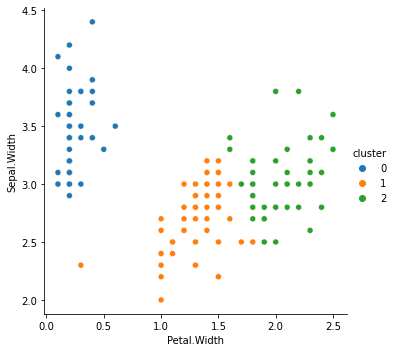

In [4]:
# Visualize the results of your clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
sns.relplot(data=df, x='Petal.Width', y='Sepal.Width', hue = 'cluster', palette = 'tab10')

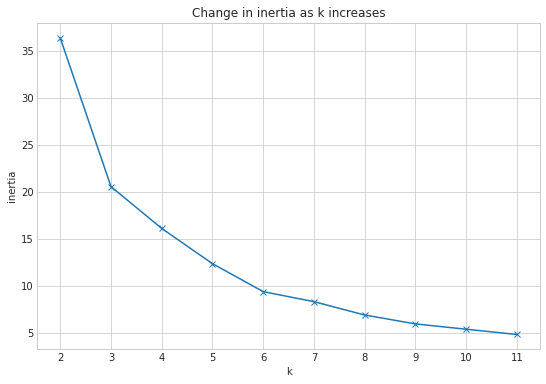

In [5]:
# Use the elbow method to visually select a good value for k.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

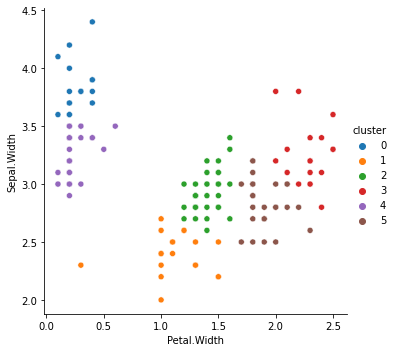

In [6]:
# Repeat the clustering, this time with 3 different features.

kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
sns.relplot(data=df, x='Petal.Width', y='Sepal.Width', hue = 'cluster', palette = 'tab10')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [7]:
sql = '''SELECT * FROM customers'''

mall_df = wrangle.get_mall_customers(sql)

In [8]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [12]:
mall_df = wrangle.wrangle_mall_df()

Number of observations removed: 2


In [13]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             198 non-null    int64
 1   annual_income   198 non-null    int64
 2   spending_score  198 non-null    int64
 3   is_male         198 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 6.4 KB


In [14]:
mall_df.describe()

,age,annual_income,spending_score,is_male
count,198.000000,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970,0.434343
std,14.016852,25.237259,25.746846,0.496927
min,18.000000,15.000000,1.000000,0.000000
25%,28.250000,40.500000,35.000000,0.000000
50%,36.000000,61.000000,50.000000,0.000000
75%,49.000000,77.750000,72.750000,1.000000
max,70.000000,126.000000,99.000000,1.000000


In [23]:
mall_df

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
194,38,113,91,0
195,47,120,16,0
196,35,120,79,0


In [27]:
def split_data(df):

    ''' this function will take your raw data frame, clean it and split it'''
    
    # split the data
    train_validate, test = train_test_split(df, test_size=.2, random_state=177)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=177)
    
    # show the split
    print(f'Dataframe has been split: ')
    print(f'Train: {train.shape}')
    print(f'Validate: {validate.shape}')
    print(f'Test: {test.shape}')
    
    # return train validate and test
    return train, validate, test 

In [31]:
train, validate, test = split_data(mall_df)

Dataframe has been split: 
Train: (110, 5)
Validate: (48, 5)
Test: (40, 5)


In [32]:

X = train[['annual_income', 'spending_score']]

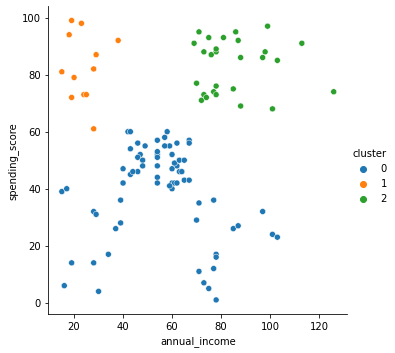

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
sns.relplot(data=train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'tab10')

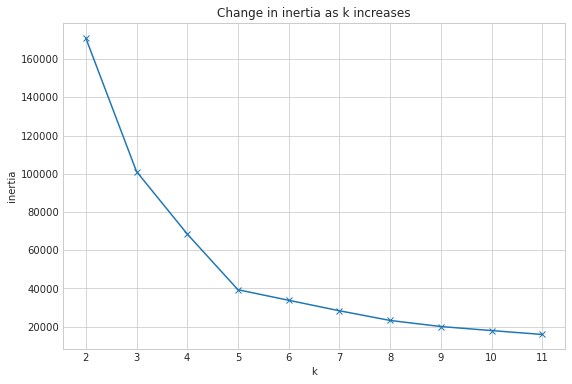

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

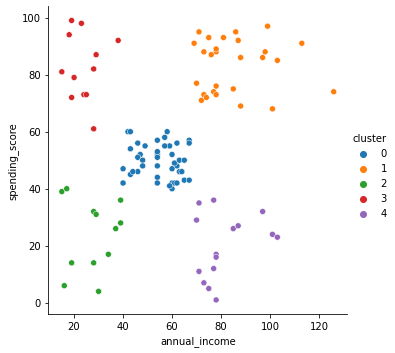

In [35]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
sns.relplot(data=train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'tab10')

3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.


In [40]:
scaler, train_scaled, validate_scaled, test_scaled = wrangle.min_max_scaler(train, validate, test)
scaler, train_scaled.shape, validate_scaled.shape, test_scaled.shape

(MinMaxScaler(), (110, 5), (48, 5), (40, 5))

In [41]:
X = train_scaled[['annual_income', 'spending_score']]

### The cluster look the same on scaled and unscaled data

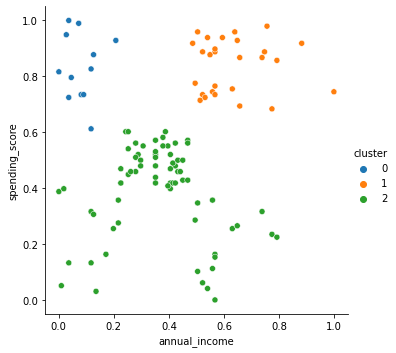

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train_scaled['cluster'] = kmeans.predict(X)
sns.relplot(data=train_scaled, x='annual_income', y='spending_score', hue = 'cluster', palette = 'tab10')

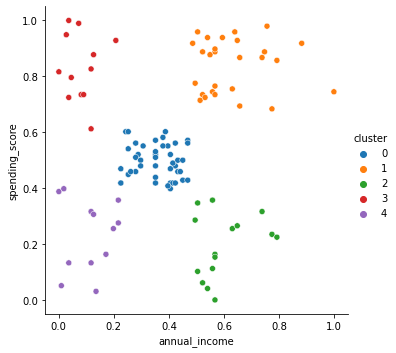

In [42]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train_scaled['cluster'] = kmeans.predict(X)
sns.relplot(data=train_scaled, x='annual_income', y='spending_score', hue = 'cluster', palette = 'tab10')


## Bonus
    a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
    b) Visualize the data and guess the number and shape of the clusters.
    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
    d) Repeat the step above but with scaled data.
    c) Write down the takeaways from this exercise.